In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
from scanpy import read_10x_h5

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### data preprocess

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# load_list=['151507','151508','151509','151510']
# load_list=['151669','151670','151671','151672']
load_list=['151508','151675']

In [22]:
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
adata_list = []
marker_gene = 'VIM'

for section_id in load_list:
    input_dir = f'./data/{section_id}'
    adata= sc.read_visium(path=input_dir, count_file=section_id + '_filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique(join="++")
    layer1=pd.read_csv(os.path.join(input_dir, 'metadata.tsv'),sep="\t",header=0)
    adata.obs['layer_guess_reordered'] = layer1.loc[:,'layer_guess_reordered']
    adata.obs_names = [x+'_'+section_id for x in adata.obs_names]

    sc.pp.calculate_qc_metrics(adata, inplace=True)

    sc.pp.filter_cells(adata, min_genes=100)
    
    a,_ = sc.pp.filter_genes(adata, min_cells=50,inplace=False)
    adata.var['filter_bool'] = a
    print('=======')
    print(adata.var['filter_bool'][marker_gene] )
    
    adata.var['filter_bool'][marker_gene] = True
    adata = adata[:, adata.var['filter_bool'].to_numpy()]

    print('After flitering: ', adata.shape)
    print(marker_gene in adata.var_names)
    # 处理数据
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=7500)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)  #将数据矩阵对数化
    # print(adata.var.highly_variable['TRABD2A'])
    adata.var.highly_variable[marker_gene] =True
    
    adata = adata[:, adata.var.highly_variable]
    
    print(marker_gene in adata.var_names)
    
    adata_list.append(adata)
    print(adata.n_obs)


    

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


True
After flitering:  (4382, 11452)
True


/tmp/ipykernel_767627/1446973961.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var['filter_bool'][marker_gene] = True
/tmp/ipykernel_767627/1446973961.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

True
4382


/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


True
After flitering:  (3592, 12462)
True


/tmp/ipykernel_767627/1446973961.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var['filter_bool'][marker_gene] = True
/tmp/ipykernel_767627/1446973961.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

True
3592


/tmp/ipykernel_767627/1446973961.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var.highly_variable[marker_gene] =True
/tmp/ipykernel_767627/1446973961.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [23]:
common_var_names = set(adata_list[0].var_names)

# 遍历剩余的 anndata 对象，逐个取交集更新 common_var_names
for anndata in adata_list[1:]:
    common_var_names.intersection_update(anndata.var_names)

common_var_names = list(common_var_names)  # 将集合转换为列表
print(len(common_var_names))

4846


In [24]:
intersection = pd.Index(common_var_names)
adata_svg_list = []
n_list = []
for adata in adata_list:
    adata_svg = adata[:,intersection]
    adata_svg = adata_svg[~adata_svg.obs.isna().any(axis=1)]
    adata_svg_list.append(adata_svg)
    n_list.append(adata_svg.n_obs)
    

In [25]:
for adata in adata_svg_list:
    print(adata.shape)
# [4219, 4379, 4786, 4593]
n_list

(4379, 4846)
(3566, 4846)


[4379, 3566]

In [26]:
import anndata as ad
adata = ad.concat(adata_svg_list, label="batch", keys=load_list)
print(marker_gene in adata.var_names)
# adata.obs

True


In [8]:
adata.write(f'./data/73-76/adata_cat.h5ad')

### start training

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
from scanpy import read_10x_h5

/home/tuwenqian/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import torch
from scipy.sparse import csr_matrix
def load_data(filepath):
    adata = sc.read_h5ad(f'{filepath}/adata_cat.h5ad')
    print('finish reading h5ad')
    # sub_graph_df = pd.read_pickle(f'{filepath}/sub_graph_7k.pickle')
    # sub_graph = sub_graph_df.values
    # print(f'sub_graph shape:{sub_graph.shape}')
    # sub_graph = torch.from_numpy(sub_graph)
    if isinstance(adata.X, csr_matrix):
        concat_expr = adata.X.toarray()
    else:
        concat_expr = adata.X
    # concat_expr = adata.X
    cor_cat = adata.obsm['spatial']
    Y = torch.from_numpy(concat_expr).to(torch.float32)
    coord = torch.from_numpy(cor_cat).to(torch.float32)
    
    return Y,coord,cor_cat,adata

In [3]:

import os
filepath = './data/74_75'
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
Y,coord,cor_cat,adata = load_data(filepath)
adata


finish reading h5ad


AnnData object with n_obs × n_vars = 7201 × 3993
    obs: 'x', 'y', 'layer_guess_reordered', 'n_genes', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-0', 'n_cells-1'
    uns: 'log1p', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

FABP7 (layer 1), HPCAL1 (layer 2), CARTPT (layer 3), PCP4 (layer 5), KRT17 (layer 6) and MBP (white matter)

In [5]:
marker_gene = ['VIM','HPCAL1','CARTPT','RORB','PCP4','KRT17','MBP']

07-10 -ok
69-72 -ok
73-76 -ok

In [6]:
cor_cat.shape#(n1+n2 , 2)

(7945, 2)

In [7]:
for marker in marker_gene:
    print(marker in adata.var_names)

True
True
True
True
True
True
True


In [5]:
# n_list=[3611, 3635, 3566, 3430]
n_list = [3635,3566]
sum(n_list)

7201

In [18]:
from model import SpaMC

#spamc = SpaMC(adata,Y,cor_cat,n_list,latent_dim=30)
spamc = SpaMC(adata,Y,cor_cat,n_list,latent_dim=30,epochs=500,gpu = 6,init_embedding=False)

cuda:6
Done! 23 communities detected. 



In [19]:
spatial_regularization=10.0
lamb=10.0
result_filepath = './results/74_75/'

In [20]:
embedding = spamc.train(f'./{result_filepath}/sp{spatial_regularization}_lamb{lamb}/',
                        start_epoch=0,
                        epochs=5000,
                        spatial_regularization_strength=spatial_regularization,
                        lamb=lamb,
                        use_partialOT=False,
                        max_patience=100,
                        min_stop=300,
                        check_inter=100,
                        use_CSGCL = True
                        )

cuda:6
start epoch:0
start mnn calculating


/home/tuwenqian/anaconda3/lib/python3.10/site-packages/torch_geometric/nn/conv/message_passing.py:966: UserWarning: 'GCNConv.jittable' is deprecated and a no-op. Please remove its usage.
  warnings.warn(f"'{self.__class__.__name__}.jittable' is deprecated "


mnn calculated!
total: 39.601727 base_loss: 9.531479, penalty: 1.139132, cross_loss:1.867892,cross_distance:35503.031250
total: 34.557152 base_loss: 9.505980, penalty: 1.355353, cross_loss:1.149764,cross_distance:21853.570312
total: 31.858101 base_loss: 9.387758, penalty: 1.342282, cross_loss:0.904752,cross_distance:17196.621094
total: 30.840683 base_loss: 9.258770, penalty: 1.331850, cross_loss:0.826341,cross_distance:15706.263672
total: 29.928467 base_loss: 9.101773, penalty: 1.317202, cross_loss:0.765467,cross_distance:14549.240234
total: 29.688259 base_loss: 9.041082, penalty: 1.308982, cross_loss:0.755736,cross_distance:14364.272461
total: 29.077324 base_loss: 8.977479, penalty: 1.275204, cross_loss:0.734780,cross_distance:13965.972656
total: 28.643686 base_loss: 8.966421, penalty: 1.266146, cross_loss:0.701581,cross_distance:13334.947266
total: 28.306650 base_loss: 9.029212, penalty: 1.252062, cross_loss:0.675682,cross_distance:12842.685547
total: 27.940228 base_loss: 8.967027, p

In [ ]:
embedding = pd.DataFrame(embedding)

### Visualize

In [ ]:
result_filepath = './results/74_75/'

In [ ]:
embedding = pd.read_csv(f'{result_filepath}/sp1.0_lamb1.0/embedding_final_epoch743_seed42.csv',header=None,delimiter='\t')

In [ ]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
AAACAAGTATCTCCCA-1_1,-0.993741,9.953393,3.671397,0.588339,12.147608,5.861351,-2.988163,0.114688,-0.240166,12.295143,...,-0.060796,12.505055,6.604118,11.188880,18.102417,-1.250880,10.135098,-2.401720,7.871247,0.049828
AAACAATCTACTAGCA-1_1,-0.282696,7.135056,13.030283,1.253679,7.729991,3.739928,-2.100515,5.024412,-0.042518,7.184405,...,-0.526486,11.039854,4.465755,-0.835760,15.165144,7.389803,6.870035,-1.603472,2.608037,5.795202
AAACACCAATAACTGC-1_1,0.811327,5.677415,18.160242,0.719832,12.414282,1.887347,-3.213223,-0.447946,5.125368,11.952637,...,8.465468,8.363159,10.950469,6.881477,15.472255,-1.229952,4.543602,-2.421815,1.991925,7.173168
AAACAGAGCGACTCCT-1_1,-1.065124,11.199978,4.670979,-0.275226,13.530506,7.236361,-3.342590,2.079745,0.238172,13.208518,...,-0.244656,10.324259,9.836423,8.994740,20.326302,-1.059843,10.738360,-2.187132,5.666135,1.184357
AAACAGCTTTCAGAAG-1_1,5.413426,11.129890,7.476094,-0.242835,13.495117,3.481631,-2.144555,3.391078,-0.242323,9.471652,...,4.486345,6.445512,14.496234,-0.473332,5.478802,4.756059,11.818343,-1.676031,4.185405,3.843615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1_2,-0.600573,3.076976,7.685341,1.659202,5.923458,4.151788,-2.016963,2.180801,2.754913,9.499992,...,4.184460,9.663548,12.864200,-1.187518,16.047325,9.761410,9.196076,-1.258032,-0.122509,10.766681
TTGTTTCACATCCAGG-1_2,0.507337,7.461116,15.983113,1.756706,7.560659,3.347077,-3.400117,-0.452831,6.555127,15.223360,...,8.670915,8.195832,12.677962,2.806578,16.001839,-0.679697,5.350913,-2.295875,5.101904,8.516322
TTGTTTCATTAGTCTA-1_2,2.002527,7.539830,18.403009,1.767804,10.556806,2.638662,-3.313302,-0.459840,5.516406,12.722264,...,7.812281,8.974583,11.956532,5.094124,16.564964,-1.011008,5.235062,-2.414720,3.169512,7.454948
TTGTTTCCATACAACT-1_2,6.247052,10.020949,7.800450,-0.322144,7.903625,2.107744,-1.623920,2.771133,-0.199240,7.684597,...,-0.487355,7.837151,15.610082,-1.486960,15.466001,14.739308,8.456883,-1.588795,1.997425,3.318996


In [ ]:
adata

AnnData object with n_obs × n_vars = 7945 × 3991
    obs: 'x', 'y', 'layer_guess_reordered', 'n_genes', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-0', 'n_cells-1'
    uns: 'log1p', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

In [ ]:
adata.obs.to_csv('74_75_spamc_umap_obs.csv', index=False)

(7201, 30)


/home/tuwenqian/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/tuwenqian/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.C

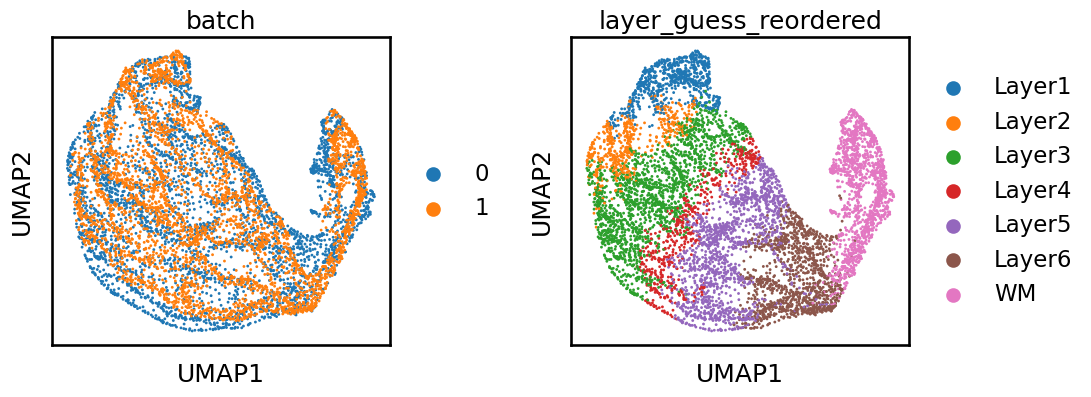

In [21]:
import matplotlib.pyplot as plt
import anndata as ad
print(embedding.shape)
#var = pd.DataFrame(index=spatial_result.columns)
obs = adata.obs
embedding = pd.DataFrame(embedding)
embedding.index = obs.index

adata_x = ad.AnnData(embedding,obs=obs)
# adata_x.obsm['X_pca_old'] = adata.obsm['X_pca'].copy()
adata_x.obsm['spatial'] = adata.obsm['spatial']
adata_x.obsm['spamc'] = adata_x.X

# adata_x.obsm['spaceFlow'] = embedding_x
# adata_x.obsm['X_pca'] = embedding_x
sc.pp.neighbors(adata_x, use_rep='spamc',random_state=666)
# sc.tl.louvain(adata_x,random_state=666, key_added="louvain", resolution=0.1)
sc.tl.umap(adata_x,random_state=666)



plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_x,color=["batch",'layer_guess_reordered',], wspace=0.4) #UMAP基础散点图

In [ ]:
adata_x

AnnData object with n_obs × n_vars = 7201 × 30
    obs: 'x', 'y', 'layer_guess_reordered', 'n_genes', 'batch'
    uns: 'neighbors', 'umap', 'batch_colors', 'layer_guess_reordered_colors'
    obsm: 'spatial', 'spamc', 'X_umap'
    obsp: 'distances', 'connectivities'